# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
import sklearn as sk

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
data=pd.read_csv('/content/gdrive/MyDrive/Econ441B/insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.loc[data['smoker']=='yes','smoker']=1
data.loc[data['smoker']=='no','smoker']=0

In [9]:
data.loc[data['sex']=='female','sex']=1
data.loc[data['sex']=='male','sex']=0

In [10]:
data["southeast"] = data["region"]
data["southwest"] = data["region"]
data["northeast"] = data["region"]
data["northwest"] = data["region"]

data.loc[data["region"] == "southwest","southwest"] = 1
data.loc[data["region"] == "southeast","southwest"] = 0
data.loc[data["region"] == "northwest","southwest"] = 0
data.loc[data["region"] == "northeast","southwest"] = 0

data.loc[data["region"] == "southwest","southeast"] = 0
data.loc[data["region"] == "southeast","southeast"] = 1
data.loc[data["region"] == "northwest","southeast"] = 0
data.loc[data["region"] == "northeast","southeast"] = 0

data.loc[data["region"] == "southwest","northeast"] = 0
data.loc[data["region"] == "southeast","northeast"] = 0
data.loc[data["region"] == "northwest","northeast"] = 1
data.loc[data["region"] == "northeast","northeast"] = 0

data.loc[data["region"] == "southwest","northwest"] = 0
data.loc[data["region"] == "southeast","northwest"] = 0
data.loc[data["region"] == "northwest","northwest"] = 0
data.loc[data["region"] == "northeast","northwest"] = 1

In [11]:
data

,age,sex,bmi,children,smoker,region,charges,southeast,southwest,northeast,northwest
0,19,1,27.900,0,1,southwest,16884.92400,0,1,0,0
1,18,0,33.770,1,0,southeast,1725.55230,1,0,0,0
2,28,0,33.000,3,0,southeast,4449.46200,1,0,0,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,0,1,0
1334,18,1,31.920,0,0,northeast,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,southeast,1629.83350,1,0,0,0
1336,21,1,25.800,0,0,southwest,2007.94500,0,1,0,0


In [12]:
df=data.drop(columns=['charges','region','southeast'])

# 2.) Split the data into 80/20, in/out sample

In [13]:
cut = int(len(data) * 0.8 // 1) 
cut

1070

In [14]:
in_data=df[:cut]
out_data=df[cut:]

In [15]:
in_data.describe()

,age,bmi,children
count,1070.000000,1070.000000,1070.000000
mean,39.551402,30.782935,1.075701
std,14.141959,6.084472,1.191986
min,18.000000,15.960000,0.000000
25%,27.000000,26.410000,0.000000
50%,40.000000,30.495000,1.000000
75%,51.750000,34.937500,2.000000
max,64.000000,52.580000,5.000000


In [16]:
target=data[['charges']]

In [17]:
in_target=target[:cut]
out_target=target[cut:]

In [18]:
in_target.describe()

,charges
count,1070.000000
mean,13214.125813
std,12033.808061
min,1121.873900
25%,4740.287150
50%,9333.014350
75%,16547.261588
max,63770.428010


# 3.) Normalize the Data

In [19]:
from sklearn import preprocessing

In [20]:
scaler=preprocessing.StandardScaler().fit(in_data)

In [21]:
in_data_scale=scaler.transform(in_data)

In [22]:
scaler=preprocessing.StandardScaler().fit(out_data)
out_data_scale=scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [23]:
import numpy as np

In [24]:
from sklearn.linear_model import LassoCV

In [25]:
modCV=LassoCV().fit(in_data_scale,in_target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
a_in=modCV.alpha_
a_in

94.07494234973737

# 5.) Run a lambda regression with that Lambda

In [27]:
mod1=sk.linear_model.Lasso(a_in).fit(in_data_scale,in_target)

In [28]:
mod1.predict(np.array(in_data_scale))

array([25014.8879334 ,  3755.74415007,  6785.29792461, ...,
       12255.93675841, 11581.80893732, 12358.56265007])

In [29]:
mod1.coef_

array([3596.48014894,   17.97530327, 1927.51434494,  434.44359399,
       9367.20708079,  -78.62279954,   91.38882747,  303.47649285])

# 6.) Visualize the coefficients 

In [30]:
in_sample = pd.DataFrame(mod1.coef_,
                       index=["age", "sex", "bmi",
                              "children", "smoker", "southwest","northest","northwest"],
                       columns=["coefficient"])

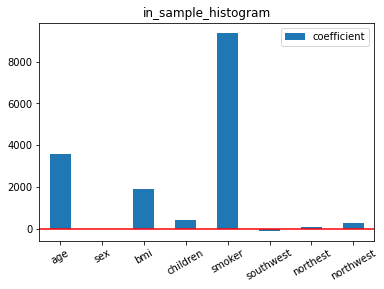

In [31]:
in_sample.plot(kind = "bar", title = "in_sample_histogram",rot=30)
plt.axhline(y=0, color='r', linestyle='-')

# 7.) Interpret the coefficients

In Sample

When holding other variants constant, increasing one unit age, the insurance charge will increase 3596 dollar

When holding other variants constant, female and male will be charged differently, with female higher than man about 17 dollar

When holding other variants constant, increasing one uit BMI, the insurance charge will increase 1927 dollar

When holding other variants constant, increasing the number of child, the insurance charge will increase 434 dollar

When holding other variants constant, smoker will usually charge higher than non-smoker with 9367 dollar
When holding other variants cosntant, different region charge differently, southwest will be charged 78 dollar lower than southeast region, northeast will be charged 91 higher than southeast region, northwest will be charged 303 higher than southeast region

# 8.) Compare in and out of sample MSE’s

In [33]:
#In Sample MSE
in_sample_mse=sk.metrics.mean_squared_error(in_target,mod1.predict(np.array(in_data_scale)))
in_sample_mse

36452750.171510026

In [34]:
#Out Sample MSE
out_sample_mse=sk.metrics.mean_squared_error(out_target, mod1.predict(np.array(out_data_scale)))
out_sample_mse

37557860.22713769

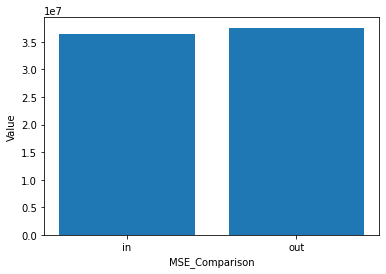

In [35]:
plt.bar(['in', 'out'], [in_sample_mse, out_sample_mse])
plt.xlabel('MSE_Comparison')
plt.ylabel('Value')
plt.show()